# Sentimental Analysis of Tesla Stock Price Prediction

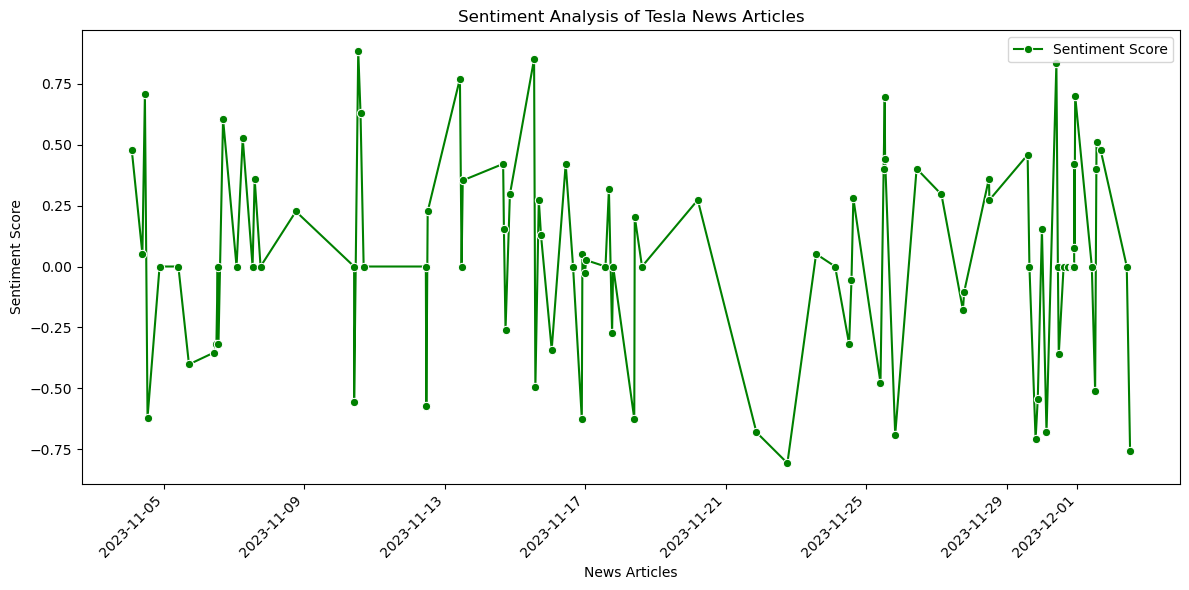

[*********************100%%**********************]  1 of 1 completed


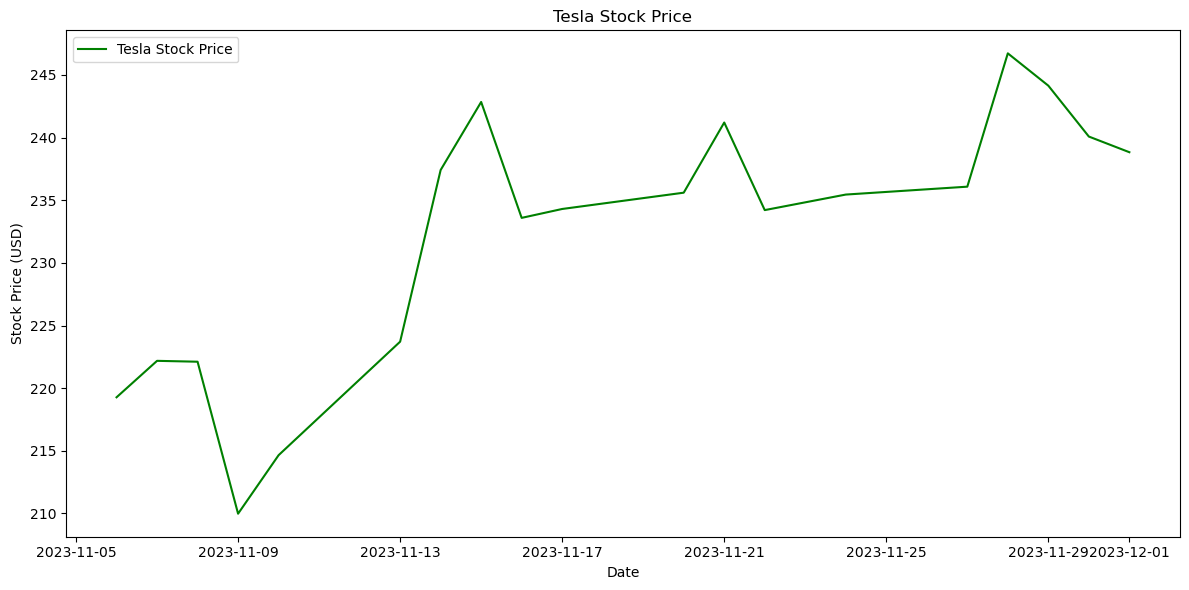

                                          Description  \
98  Elon Musk’s artificial intelligence startup xA...   
13  Lucid is selling several of its electric vehic...   
67  The i4 isn't as futuristic or flashy as some e...   
84  Here are some more folks trying desperately to...   
89  The Ariya is a big release from Nissan -- but ...   
..                                                ...   
73  “The future ain’t gonna invent itself" Yes it ...   
53  The decal, which pokes fun at Elon Musk's botc...   
19  Marques Brownlee said he was "impressed" by th...   
37  Deliveries have finally begun in the US, but t...   
29  The 28-year-old Floridian appeared to hate mod...   

    Description_Sentiment_Score  
98                       0.4767  
13                       0.0516  
67                       0.7086  
84                      -0.6204  
89                       0.0000  
..                          ...  
73                       0.4019  
53                       0.5106  
19       

In [2]:
#2 Visualizig the Tesla Stock Price and Sentiment Score of News Article
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Function to perform sentiment analysis using VaderSentiment
def analyze_sentiment(text):
    if isinstance(text, str):  # Check if 'text' is a string
        analyzer = SentimentIntensityAnalyzer()
        sentiment_score = analyzer.polarity_scores(text)['compound']
        return sentiment_score
    else:
        return 0.0

# Function to fetch historical stock prices for Tesla
def get_stock_data(stock_symbol, start_date, end_date):
    stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
    return stock_data

#stock symbol for Tesla
tesla_stock_symbol = 'TSLA'

# Applying the desired date range for historical stock data
start_date = '2023-11-04'
end_date = datetime.datetime.today().strftime('2023-12-03')

#Getting CSV file containing news articles
news_data_path = 'news_data.csv'

# Load news data from CSV
news_df = pd.read_csv(news_data_path)

# Filter news data for the desired date range
news_df['Date'] = pd.to_datetime(news_df['Date'])
filtered_news_df = news_df[(news_df['Date'] >= start_date) & (news_df['Date'] <= end_date)]

# Calculate sentiment for the filtered news articles

filtered_news_df = filtered_news_df.sort_values(by='Date')

filtered_news_df['Description_Sentiment_Score'] = filtered_news_df['Description'].apply(analyze_sentiment)

#output_file_path = 'output_with_sentimentscores.csv'
#filtered_news_df.to_csv(output_file_path, index=False)

# Plotting sentiment scores using matplotlib and seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_news_df, x='Date', y='Description_Sentiment_Score', marker='o', label='Sentiment Score', color='green')
plt.xticks(rotation=45, ha='right')
plt.title('Sentiment Analysis of Tesla News Articles')
plt.xlabel('News Articles')
plt.ylabel('Sentiment Score')
plt.tight_layout()
plt.show()


# Fetch historical stock prices for Tesla
tesla_stock_data = get_stock_data(tesla_stock_symbol, start_date, end_date)

# Plotting Tesla stock data
plt.figure(figsize=(12, 6))
plt.plot(tesla_stock_data.index, tesla_stock_data['Close'], label='Tesla Stock Price', color='green')
plt.title('Tesla Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.tight_layout()
plt.show()

# Print the results
print(filtered_news_df[['Description', 'Description_Sentiment_Score']])
print(stock_data.head())
#print(f"Results saved to {output_file_path}")

In [3]:
stock_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [4]:
news_df.head()

,Date,Title,Description
0,2023-11-27 18:11:03,Tesla Is Suing Sweden,Unions are boycotting Tesla’s business operati...
1,2023-11-27 19:05:47,Tesla sues Sweden for blocking license plate d...,Tesla sued Sweden’s transportation agency and ...
2,2023-11-07 05:50:45,Lucid EVs will be able to access Tesla's Super...,Lucid's electric vehicles will be able to plug...
3,2023-11-30 21:47:26,Tesla Cybertruck will usher in a new ‘Powersha...,Tesla’s Cybertruck will be the company’s first...
4,2023-11-30 00:12:30,Tesla’s Cybertruck Is Two Years Late and Still...,"After years of delays, Tesla will livestream i..."


### Preprocessing news data and getting sentimental analysis

In [5]:
sent_df =news_df.copy()
sent_df["sentiment_score"] = ''
sent_df["Negative"] = ''
sent_df["Neutral"] = ''
sent_df["Positive"] = ''
sent_df.head()

,Date,Title,Description,sentiment_score,Negative,Neutral,Positive
0,2023-11-27 18:11:03,Tesla Is Suing Sweden,Unions are boycotting Tesla’s business operati...,,,,
1,2023-11-27 19:05:47,Tesla sues Sweden for blocking license plate d...,Tesla sued Sweden’s transportation agency and ...,,,,
2,2023-11-07 05:50:45,Lucid EVs will be able to access Tesla's Super...,Lucid's electric vehicles will be able to plug...,,,,
3,2023-11-30 21:47:26,Tesla Cybertruck will usher in a new ‘Powersha...,Tesla’s Cybertruck will be the company’s first...,,,,
4,2023-11-30 00:12:30,Tesla’s Cybertruck Is Two Years Late and Still...,"After years of delays, Tesla will livestream i...",,,,


In [6]:

import unicodedata

#Creating an instance of SentimentIntensityAnalyzer for sentiment analysis
sentiment_analyzer = SentimentIntensityAnalyzer()

#Loop through rows of the DataFrame for sentiment analysis
for indx, row in sent_df.T.iteritems():
    try:
        sentence_i = unicodedata.normalize('NFKD', sent_df.loc[indx, 'Description'])
        sentence_sentiment = sentiment_analyzer.polarity_scores(sentence_i)
        #Updating the DataFrame with sentiment scores
        sent_df.at[indx, 'sentiment_score'] = sentence_sentiment['compound']
        sent_df.at[indx, 'Negative'] = sentence_sentiment['neg']
        sent_df.at[indx, 'Neutral'] = sentence_sentiment['neu']
        sent_df.at[indx, 'Positive'] = sentence_sentiment['pos']
    #Handle TypeError exceptions    
    except TypeError:
        print (sent_df.loc[indx, 'Description'])
        print (indx)
        break

nan
58


C:\Users\niyu1\AppData\Local\Temp\ipykernel_24084\859016051.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for indx, row in sent_df.T.iteritems():


In [7]:
sent_df.head()

,Date,Title,Description,sentiment_score,Negative,Neutral,Positive
0,2023-11-27 18:11:03,Tesla Is Suing Sweden,Unions are boycotting Tesla’s business operati...,-0.1779,0.168,0.722,0.11
1,2023-11-27 19:05:47,Tesla sues Sweden for blocking license plate d...,Tesla sued Sweden’s transportation agency and ...,-0.1027,0.131,0.794,0.075
2,2023-11-07 05:50:45,Lucid EVs will be able to access Tesla's Super...,Lucid's electric vehicles will be able to plug...,0.5267,0.0,0.901,0.099
3,2023-11-30 21:47:26,Tesla Cybertruck will usher in a new ‘Powersha...,Tesla’s Cybertruck will be the company’s first...,0.0,0.0,1.0,0.0
4,2023-11-30 00:12:30,Tesla’s Cybertruck Is Two Years Late and Still...,"After years of delays, Tesla will livestream i...",0.1531,0.0,0.944,0.056


In [8]:
# Convert the 'Date' column to a datetime object
sent_df['Date'] = pd.to_datetime(sent_df['Date'])
# Extract the date component from the datetime objec
sent_df['Date'] = sent_df['Date'].dt.date

# Attempt to drop columns 'Negative', 'Positive', 'Neutral' from the DataFrame
try:
    sent_df = sent_df.drop(columns=['Negative', 'Positive', 'Neutral'])
except:
    pass
sent_df.head()

,Date,Title,Description,sentiment_score
0,2023-11-27,Tesla Is Suing Sweden,Unions are boycotting Tesla’s business operati...,-0.1779
1,2023-11-27,Tesla sues Sweden for blocking license plate d...,Tesla sued Sweden’s transportation agency and ...,-0.1027
2,2023-11-07,Lucid EVs will be able to access Tesla's Super...,Lucid's electric vehicles will be able to plug...,0.5267
3,2023-11-30,Tesla Cybertruck will usher in a new ‘Powersha...,Tesla’s Cybertruck will be the company’s first...,0.0
4,2023-11-30,Tesla’s Cybertruck Is Two Years Late and Still...,"After years of delays, Tesla will livestream i...",0.1531


In [9]:
sent_df['Date']

0     2023-11-27
1     2023-11-27
2     2023-11-07
3     2023-11-30
4     2023-11-30
         ...    
95    2023-11-10
96    2023-11-30
97    2023-11-30
98    2023-11-04
99    2023-11-06
Name: Date, Length: 100, dtype: object

In [11]:
# Extract the 'Date' column values and convert to a list
sent_date = sent_df['Date'].tolist()

# Extract the 'sentiment_score' column values and convert to a list
sent_sent_score = sent_df['sentiment_score'].tolist()

data = {"date": sent_date, "sentimental_score": sent_sent_score}

# print(data)

df = pd.DataFrame(data)

# Convert 'sentimental_score' column to numeric type
df['sentimental_score'] = pd.to_numeric(df['sentimental_score'], errors='coerce')

# Group by 'date' and calculate average sentimental score
grouped_df = df.groupby('date')['sentimental_score'].mean().reset_index()

# Display the grouped DataFrame
# print("Grouped DataFrame:")
# print(grouped_df)

# Create a new DataFrame with unique dates and their corresponding average sentimental scores
unique_dates_df = pd.DataFrame({
    'Date': grouped_df['date'],
    'average_sentimental_score': grouped_df['sentimental_score']
})

# Display the new DataFrame
# print("\nNew DataFrame with Unique Dates and Average Sentimental Scores:")
unique_dates_df = unique_dates_df.dropna()
print(unique_dates_df.head())

         Date  average_sentimental_score
0  2023-11-04                   0.051600
1  2023-11-05                  -0.200950
2  2023-11-06                  -0.176750
3  2023-11-07                   0.221975
5  2023-11-10                   0.024533


In [12]:
# tesla_df = sent_df.groupby([sent_df['Date']])['sentiment_score'].mean().reset_index()
# print(tesla_df.shape)
# tesla_df.head()
print(len(sent_df['sentiment_score']))

100


### Preprocessing Stock Dataset

In [13]:
stock_df = pd.read_csv("C:\\Users\\niyu1\\Downloads\\Tesla_data.csv")  # Replace with your actual file name
stock_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-11-06,223.979996,226.320007,215.000000,219.270004,219.270004,117335800
1,2023-11-07,219.979996,223.119995,215.720001,222.179993,222.179993,116900100
2,2023-11-08,223.149994,224.149994,217.639999,222.110001,222.110001,106584800
3,2023-11-09,219.750000,220.800003,206.679993,209.979996,209.979996,142110500
4,2023-11-10,210.029999,215.380005,205.690002,214.649994,214.649994,130994000


In [14]:
stock_df['Date'] = pd.to_datetime(stock_df['Date'])
stock_df['Date'] = stock_df['Date'].dt.date
stock_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-11-06,223.979996,226.320007,215.000000,219.270004,219.270004,117335800
1,2023-11-07,219.979996,223.119995,215.720001,222.179993,222.179993,116900100
2,2023-11-08,223.149994,224.149994,217.639999,222.110001,222.110001,106584800
3,2023-11-09,219.750000,220.800003,206.679993,209.979996,209.979996,142110500
4,2023-11-10,210.029999,215.380005,205.690002,214.649994,214.649994,130994000


In [15]:
# Merge datasets on the 'Date' column using an inner join

merged_data = pd.merge(stock_df, unique_dates_df, on='Date', how='inner')
merged_data = merged_data.dropna() # Drop NaN values, if any, after the merge
# Display the merged and cleaned data
print(merged_data.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2023-11-06  223.979996  226.320007  215.000000  219.270004  219.270004   
1  2023-11-07  219.979996  223.119995  215.720001  222.179993  222.179993   
2  2023-11-10  210.029999  215.380005  205.690002  214.649994  214.649994   
3  2023-11-13  215.600006  225.399994  211.610001  223.710007  223.710007   
4  2023-11-14  235.029999  238.139999  230.720001  237.410004  237.410004   

      Volume  average_sentimental_score  
0  117335800                  -0.176750  
1  116900100                   0.221975  
2  130994000                   0.024533  
3  140447600                   0.385850  
4  149771600                   0.358750  


In [16]:
merged_data.size

128

In [17]:
df = merged_data

try:
    # Calculate the 'DAY_DELTA' as the number of days since the minimum date in the 'Date' column
    df['DAY_DELTA'] = (df.Date - df.Date.min()).dt.days
    df['HOURS_DELTA'] = (df.Date - df.Date.min()).dt.components['hours']
    df = df.drop('Date', axis=1)
except:
    pass
merged_data = df

merged_data.head(17)

,Open,High,Low,Close,Adj Close,Volume,average_sentimental_score,DAY_DELTA,HOURS_DELTA
0,223.979996,226.320007,215.000000,219.270004,219.270004,117335800,-0.176750,0,0
1,219.979996,223.119995,215.720001,222.179993,222.179993,116900100,0.221975,1,0
2,210.029999,215.380005,205.690002,214.649994,214.649994,130994000,0.024533,4,0
3,215.600006,225.399994,211.610001,223.710007,223.710007,140447600,0.385850,7,0
4,235.029999,238.139999,230.720001,237.410004,237.410004,149771600,0.358750,8,0
5,239.289993,246.699997,236.449997,242.839996,242.839996,150354000,0.489950,9,0
6,239.490005,240.880005,230.960007,233.589996,233.589996,136816800,0.043967,10,0
7,232.000000,237.389999,226.539993,234.300003,234.300003,142532800,0.000000,11,0
8,235.039993,243.619995,233.339996,241.199997,241.199997,122288000,-0.680800,15,0
9,242.039993,244.009995,231.399994,234.210007,234.210007,117950600,-0.807400,16,0


In [18]:
# Define features (X) and target variable (y)
X = merged_data.drop(columns=['Close'])
y = merged_data['Close']

#split the dataset into training set and test set
X_train = X[:10]
X_test = X[10:]

y_train = y[:10]
y_test = y[10:]


print(len(X_train), len(X_test))
print(len(y_train), len(y_test))
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

10 6
10 6


### Training model using Random Forest

Mean Squared Error: 0.12546431824220836


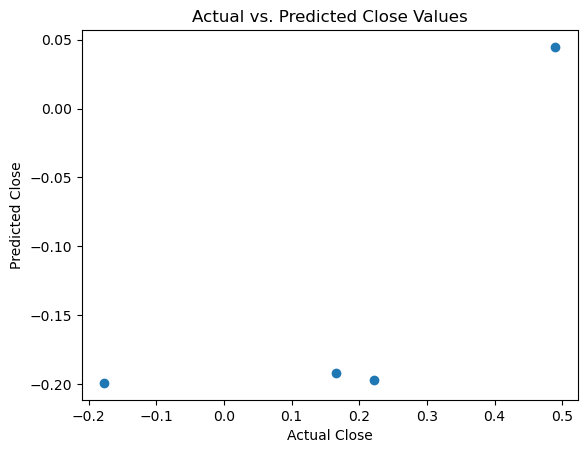

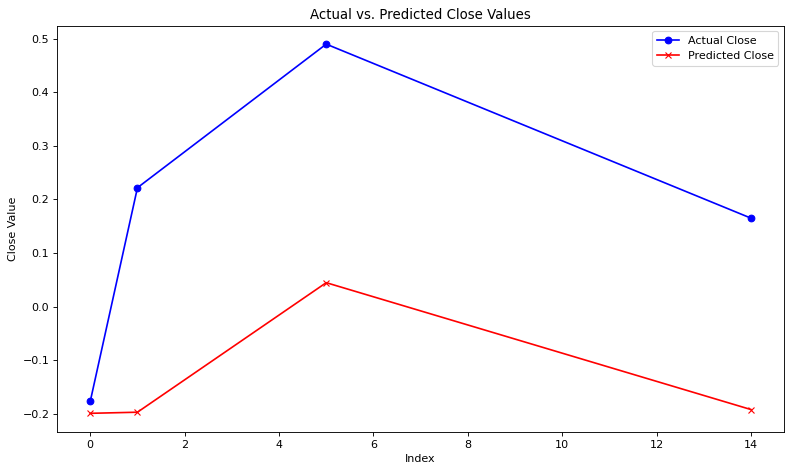

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your dataset
# Assuming your dataset is in a CSV file named 'your_dataset.csv'
df = merged_data

# Define features (X) and target variable (y)
X = df.drop('average_sentimental_score', axis=1)
y = df['average_sentimental_score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

# print(y_test)
# print("-----")
# print(y_pred)
#r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
#print(f'R-squared: {r2}')


# Plotting the line graph
plt.figure(figsize=(10, 6), dpi=80)

# Plotting the actual values in blue
plt.plot(y_test.index, y_test.values, label='Actual Close', color='blue', marker='o')

# Plotting the predicted values in red
plt.plot(y_test.index, y_pred, label='Predicted Close', color='red', marker='x')

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Close Value')
plt.title('Actual vs. Predicted Close Values')
plt.legend()
plt.tight_layout()
plt.show()

